<h1>Training Code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [3]:
################# Parameters #####################
 
path = "myData" # folder with all the class folders
labelFile = 'labels.csv' # file with all names of classes
batch_size_val=50  # how many to process together
steps_per_epoch_val=2000
epochs_val=30
imageDimesions = (64,64,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation

In [4]:
import cv2
def resize_cv(img):
    return cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)

In [6]:
################ Importing of the Images #################
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg = resize_cv(curImg)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 32
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  


In [7]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [8]:
print(X_train.shape)

(34591, 64, 64, 3)


In [9]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(34591, 64, 64, 3) (34591,)
Validation(8648, 64, 64, 3) (8648,)
Test(10810, 64, 64, 3) (10810,)


In [10]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (32, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == int(myList[j])]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[1375, 913, 1004, 971, 982, 1120, 1031, 1104, 1181, 1123, 1151, 1077, 1089, 1195, 1074, 978, 1133, 1189, 1133, 1044, 1107, 859, 1113, 1171, 809, 882, 1008, 1094, 1055, 1253, 1081, 1292]


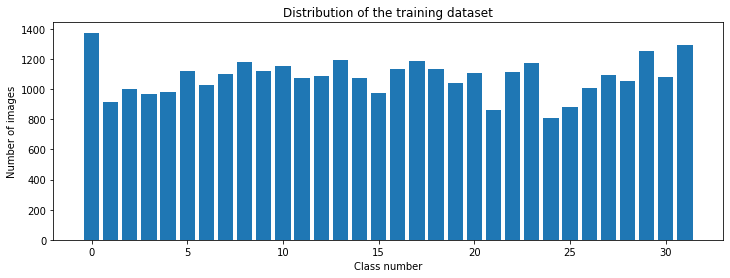

In [15]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [16]:
############################### PREPROCESSING THE IMAGES
 
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
#cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

In [17]:
############################### ADD A DEPTH OF 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [18]:
print(X_train.shape)

(34591, 64, 64, 1)


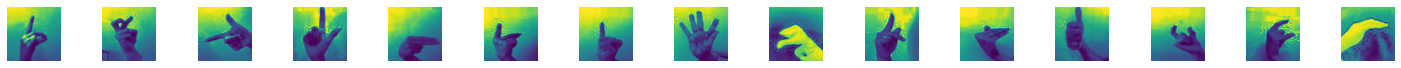

In [19]:
############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [ ]:
############################### CONVOLUTION NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
 
 
############################### TRAIN
model = myModel()
print(model.summary())

steps_per_epoch_val = len(X_train)//batch_size_val
validation_steps = len(X_test)//batch_size_val

history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)
 
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
# STORE THE MODEL AS A PICKLE OBJECT
#pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
#pickle.dump(model,pickle_out)
#pickle_out.close()
cv2.waitKey(0)


<h1>Test Code</h1>

In [ ]:
import pickle
pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()

In [ ]:
# To save the model:

from keras.models import save_model

# you can write whatever you desire instead of 'my_model'
# model = Your trained model
model.save('my_model')

# To load the model:

from keras.models import load_model

reconstructed_model = load_model("my_model")

In [30]:
import tensorflow as tf
tf.keras.models.save_model(model, "model_trained2.p")
cv2.waitKey(0)

INFO:tensorflow:Assets written to: model_trained2.p\assets


-1

In [44]:
from keras.models import save_model

# you can write whatever you desire instead of 'my_model'
# model = Your trained model

model.save('model_trained2.p')

INFO:tensorflow:Assets written to: model_trained.p\assets


In [1]:
letters = {0:'ع',
1:'ال',
2:'ا',
3:'ب',
4:'د',
5:'ظ',
6:'ض',
7:'ف',
8:'ق',
9:'غ',
10:'ه',
11:'ح',
12:'ج',
13:'ك',
14:'خ',
15:'لا',
16:'ل',
17:'م',
18:'ن',
19:'ر',
20:'ص',
21:'س',
22:'ش',
23:'ط',
24:'ت',
25:'ذ',
26:'ث',
27:'ة',
28:'و',
29:'ئ',
30:'ي',
31:'ز'}

def getCalssName2(classNo):
    return letters.get(classNo)

print(getCalssName2(22)+getCalssName2(30))

شي


In [ ]:
import numpy as np
import cv2
import pickle
from keras.models import load_model
 
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.70         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

# IMPORT THE TRANNIED MODEL
model = load_model("model_trained2.p")

 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Ain'
    elif classNo == 1: return 'Al'
    elif classNo == 2: return 'Alef'
    elif classNo == 3: return 'Baa'
    elif classNo == 4: return 'Dal'
    elif classNo == 5: return 'Dha'
    elif classNo == 6: return 'Dhad'
    elif classNo == 7: return 'Fa'
    elif classNo == 8: return 'Gaaf'
    elif classNo == 9: return 'Ghain'
    elif classNo == 10: return 'Haa'
    elif classNo == 11: return 'Ha'
    elif classNo == 12: return 'Geem'
    elif classNo == 13: return 'Kaaf'
    elif classNo == 14: return 'Khaa'
    elif classNo == 15: return 'La'
    elif classNo == 16: return 'Laam'
    elif classNo == 17: return 'Mem'
    elif classNo == 18: return 'Non'
    elif classNo == 19: return 'Raa'
    elif classNo == 20: return 'Saad'
    elif classNo == 21: return 'Seen'
    elif classNo == 22: return 'Sheen'
    elif classNo == 23: return 'Ta'
    elif classNo == 24: return 'Taa'
    elif classNo == 25: return 'Dhal'
    elif classNo == 26: return 'Thaa'
    elif classNo == 27: return 'Taa2'
    elif classNo == 28: return 'Waw'
    elif classNo == 29: return 'Ya'
    elif classNo == 30: return 'Yaa'
    elif classNo == 31: return 'Zay'

def getCalssName2(classNo):
    return letters.get(classNo)
 
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
    
    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (64, 64))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 64, 64, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = np.argmax(predictions,axis=1)
    #classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)
        
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break